In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # for google colab. adjust accordingly
PARENT_DIR = '/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download de

import pickle
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn, optim
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torch.distributions.beta import Beta

import math
import copy

import torchtext
from torchtext.data.metrics import bleu_score
from torchtext.legacy import data, datasets

import sys
sys.path.append(PARENT_DIR)

from tqdm.notebook import tqdm
from random import random

from timeit import default_timer as timer

from load_data import load_pickled_dataloaders
train_ds, val_ds, test_ds, train_dl, val_dl, test_dl = load_pickled_dataloaders(small = True, batch1 = False)

UNK_IDX = 0 
PADDING_IDX = 1 
BOS_IDX = 2
EOS_IDX = 3 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
from seq2seqTF import Seq2SeqTF
from batchTF import Batch
from trainTF import train, translate_corpus
from load_lm import *

In [ ]:
def get_unigram_freq(dl, vocab_length):
  freqs = [0]*vocab_length
  total = 0
  for batch in iter(dl):
    input_seqs = batch[0]
    for seq in input_seqs:
      for token in seq:
        total += 1
        freqs[int(token)] += 1
  freqs = np.array(freqs)
  freqs = freqs/sum(freqs)
  return freqs
  
uni = get_unigram_freq(train_dl, train_ds.source_vocab_size)

In [ ]:
lm = load_lm()

# No Augmentation

In [ ]:
model = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "none",
    gamma = 0.10
).to(device)


best_model, train_losses, val_losses, bleus, which = train(
    model,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6']
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.179, Val loss: 4.697,Epoch time = 106.800s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.019825678318738937


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.592, Val loss: 4.462,Epoch time = 108.022s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024386394768953323


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.320, Val loss: 4.332,Epoch time = 107.169s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0227164588868618


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.067, Val loss: 4.182,Epoch time = 107.578s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028833581134676933


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.791, Val loss: 3.994,Epoch time = 107.695s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.036747898906469345


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.481, Val loss: 3.799,Epoch time = 107.409s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04721973091363907


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.162, Val loss: 3.671,Epoch time = 107.968s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05048913136124611


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 2.873, Val loss: 3.641,Epoch time = 107.242s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04320685565471649


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.641, Val loss: 3.651,Epoch time = 108.096s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.046575721353292465


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.454, Val loss: 3.702,Epoch time = 108.047s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04348283261060715


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.298, Val loss: 3.750,Epoch time = 107.370s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04465487226843834


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.165, Val loss: 3.832,Epoch time = 108.198s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.048598144203424454


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.049, Val loss: 3.836,Epoch time = 108.480s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.047093335539102554


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 1.931, Val loss: 3.904,Epoch time = 107.878s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04181430861353874


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 1.839, Val loss: 4.001,Epoch time = 108.452s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05188576132059097


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 1.761, Val loss: 4.014,Epoch time = 109.090s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04436396062374115


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 1.663, Val loss: 4.100,Epoch time = 108.002s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.049425020813941956


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.608, Val loss: 4.139,Epoch time = 108.568s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05136986821889877


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.537, Val loss: 4.178,Epoch time = 108.285s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04630285128951073


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.477, Val loss: 4.239,Epoch time = 108.782s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04846419021487236


In [ ]:
best_model = torch.load(PARENT_DIR+"jennas_models/epoch17")

In [ ]:
candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model, eos_idx = EOS_IDX, bos_idx = BOS_IDX, padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.04051137715578079


In [ ]:
#candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
print("test bleu", test_bleu)

test bleu 0.22059966623783112


In [ ]:
pd.DataFrame({
    'train_losses': train_losses,
    'val_losses': val_losses
}).plot(xlabel='epoch #', ylabel='loss', title='No Augmentation: Train and Validation Loss')

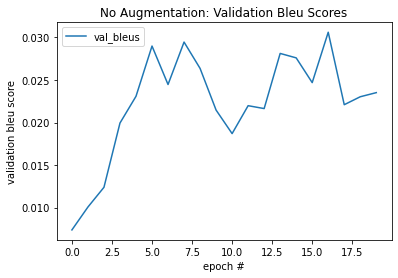

In [ ]:
pd.DataFrame({
    'val_bleus': bleus
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='No Augmentation: Validation Bleu Scores')

In [ ]:
torch.save(best_model, PARENT_DIR+"jennas_model_none")

# Drop

In [ ]:
model_drop = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "drop",
    gamma = 0.10
).to(device)


best_model_drop, train_losses_drop, val_losses_drop, bleus_drop, which_drop = train(
    model_drop,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_drop",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_drop contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19']
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.212, Val loss: 4.740,Epoch time = 123.792s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.004299643071380853


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.642, Val loss: 4.535,Epoch time = 123.495s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.004571394940702622


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.388, Val loss: 4.372,Epoch time = 124.205s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.014190915998854688


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.160, Val loss: 4.217,Epoch time = 124.869s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.016269464853929095


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.912, Val loss: 4.020,Epoch time = 124.354s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0249870757114082


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.641, Val loss: 3.872,Epoch time = 124.323s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02339112590164202


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.359, Val loss: 3.787,Epoch time = 124.741s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025688341915644123


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.099, Val loss: 3.658,Epoch time = 124.571s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02452947926992438


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.892, Val loss: 3.667,Epoch time = 124.305s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024968464805187784


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.718, Val loss: 3.636,Epoch time = 124.566s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025771406749676963


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.577, Val loss: 3.683,Epoch time = 123.910s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027971507317846617


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.459, Val loss: 3.694,Epoch time = 124.893s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02468815537980001


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.342, Val loss: 3.749,Epoch time = 124.238s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028719963049681583


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.246, Val loss: 3.694,Epoch time = 125.013s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.021687074638543927


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.155, Val loss: 3.753,Epoch time = 124.576s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027873969853314612


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.068, Val loss: 3.883,Epoch time = 125.051s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023870097667578298


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 1.996, Val loss: 3.930,Epoch time = 124.663s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024527553097499242


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.921, Val loss: 3.912,Epoch time = 125.415s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03278791743138213


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.857, Val loss: 4.020,Epoch time = 124.829s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025034278584710197


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.801, Val loss: 4.072,Epoch time = 125.067s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02577140188220755


In [ ]:
best_model_drop = torch.load(PARENT_DIR+"jennas_model_drop")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_drop, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_drop, eos_idx = EOS_IDX, bos_idx = BOS_IDX, padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.03855021670460701
test bleu_1 0.23329131305217743


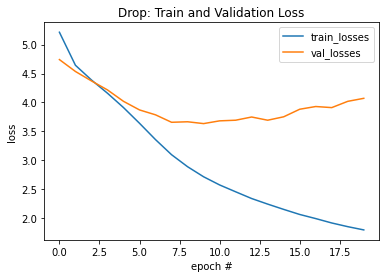

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_drop,
    'val_losses': val_losses_drop
}).plot(xlabel='epoch #', ylabel='loss', title='Drop: Train and Validation Loss')

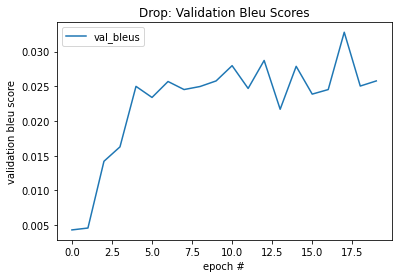

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_drop
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Drop: Validation Bleu Scores')

In [ ]:
which_drop

17

In [ ]:
torch.save(best_model_drop, PARENT_DIR+"jennas_model_drop")

# Swap

In [ ]:
model_swap = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "swap",
    gamma = 0.10,
    k = 3
).to(device)


best_model_swap, train_losses_swap, val_losses_swap, bleus_swap, which_swap = train(
    model_swap,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_swap",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_swap contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19', 'load_lm.py']
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.189, Val loss: 4.688,Epoch time = 111.967s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.005400219552636366


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.600, Val loss: 4.496,Epoch time = 111.928s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.00898003969324717


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.332, Val loss: 4.361,Epoch time = 112.327s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01262881618720809


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.097, Val loss: 4.202,Epoch time = 112.638s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01697501035750155


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.824, Val loss: 4.007,Epoch time = 112.688s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.021980172210297872


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.523, Val loss: 3.868,Epoch time = 112.414s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02518714278398564


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.208, Val loss: 3.777,Epoch time = 112.518s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025755246256525956


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 2.923, Val loss: 3.599,Epoch time = 113.091s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.026575379776581035


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.694, Val loss: 3.660,Epoch time = 112.825s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02322342262553615


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.504, Val loss: 3.636,Epoch time = 113.432s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022505322870052833


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.349, Val loss: 3.660,Epoch time = 112.748s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02377037619882501


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.221, Val loss: 3.720,Epoch time = 113.388s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023379914875323392


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.098, Val loss: 3.719,Epoch time = 113.353s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02356071578766316


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 1.998, Val loss: 3.809,Epoch time = 113.615s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022241347553119132


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 1.902, Val loss: 3.857,Epoch time = 113.037s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024860707309324492


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 1.815, Val loss: 4.004,Epoch time = 113.666s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.021842504135533264


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 1.743, Val loss: 4.047,Epoch time = 113.057s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023978134068082996


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.673, Val loss: 4.098,Epoch time = 114.311s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027857691074214964


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.609, Val loss: 4.114,Epoch time = 113.423s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025022427821888796


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.549, Val loss: 4.187,Epoch time = 113.841s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023146321792120377


In [ ]:
best_model_swap = torch.load(PARENT_DIR+"jennas_model_swap")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_swap, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_swap, eos_idx = EOS_IDX, bos_idx = BOS_IDX, padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.042889513075351715
test bleu_1 0.2295362651348114


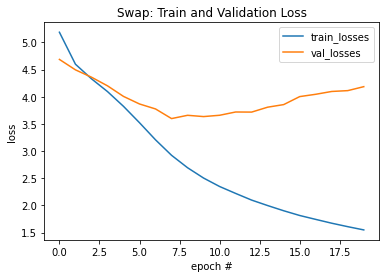

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_swap,
    'val_losses': val_losses_swap
}).plot(xlabel='epoch #', ylabel='loss', title='Swap: Train and Validation Loss')

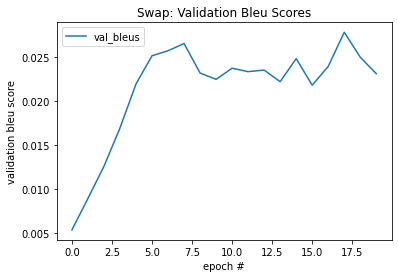

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_swap
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Swap: Validation Bleu Scores')

In [ ]:
torch.save(best_model_swap, PARENT_DIR+"jennas_model_swap")

# Blank

In [ ]:
model_blank = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "blank",
    unk_idx = UNK_IDX,
    gamma = 0.10,

).to(device)


best_model_blank, train_losses_blank, val_losses_blank, bleus_blank, which_blank = train(
    model_blank,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_blank",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_blank contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19']
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.212, Val loss: 4.700,Epoch time = 107.440s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.006302306320201059


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.645, Val loss: 4.517,Epoch time = 107.475s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.008032333740377864


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.390, Val loss: 4.381,Epoch time = 107.514s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.011657133977380205


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.165, Val loss: 4.228,Epoch time = 108.092s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.015006525486620596


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.919, Val loss: 4.043,Epoch time = 108.500s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023937213313225854


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.650, Val loss: 3.889,Epoch time = 108.651s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022588754375466313


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.369, Val loss: 3.800,Epoch time = 108.743s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023021061294276817


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.111, Val loss: 3.669,Epoch time = 109.146s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028258738634593283


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.898, Val loss: 3.693,Epoch time = 108.862s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02309497737274342


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.729, Val loss: 3.667,Epoch time = 108.919s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02531833740965083


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.584, Val loss: 3.714,Epoch time = 108.637s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0270686739390063


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.468, Val loss: 3.753,Epoch time = 109.248s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02795580145426503


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.350, Val loss: 3.800,Epoch time = 109.587s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02223334218302591


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.257, Val loss: 3.804,Epoch time = 108.970s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02413507790591112


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.166, Val loss: 3.805,Epoch time = 108.757s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027739414788147523


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.078, Val loss: 3.950,Epoch time = 109.147s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024581835917821534


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.009, Val loss: 3.975,Epoch time = 108.819s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028862247357732938


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.935, Val loss: 3.966,Epoch time = 109.771s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02672417483634428


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.870, Val loss: 3.992,Epoch time = 108.998s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02548519482255871


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.809, Val loss: 4.076,Epoch time = 109.459s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.026468508886411075


In [ ]:
which_blank

16

In [ ]:
best_model_blank = torch.load(PARENT_DIR+"jennas_model_blank")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_blank, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_blank, eos_idx = EOS_IDX, bos_idx = BOS_IDX,padding_idx= PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.035630542784929276
test bleu_1 0.22625915706157684


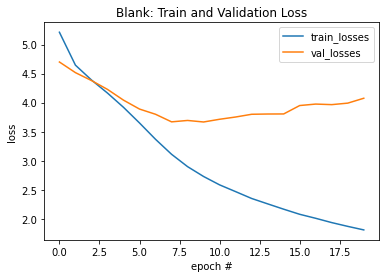

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_blank,
    'val_losses': val_losses_blank
}).plot(xlabel='epoch #', ylabel='loss', title='Blank: Train and Validation Loss')

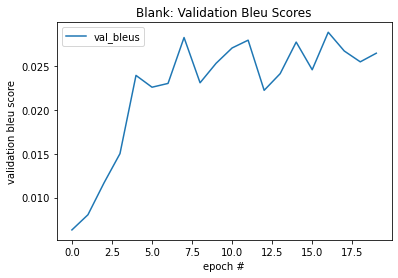

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_blank
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Blank: Validation Bleu Scores')

In [ ]:
torch.save(best_model_blank, PARENT_DIR+"jennas_model_blank")

# Smooth

In [ ]:
model_smooth = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "smooth",
    unigram_freq = uni,
    gamma = 0.10
).to(device)


best_model_smooth, train_losses_smooth, val_losses_smooth, bleus_smooth, which_smooth = train(
    model_smooth,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_smooth",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_smooth contains ['epoch0']
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.210, Val loss: 4.706,Epoch time = 123.100s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.004765093200698783


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.648, Val loss: 4.509,Epoch time = 124.477s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.006640791103216456


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.401, Val loss: 4.381,Epoch time = 123.138s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.009069222358822343


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.174, Val loss: 4.240,Epoch time = 123.724s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.017085143313125304


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.931, Val loss: 4.040,Epoch time = 124.456s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.021654785737479147


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.667, Val loss: 3.859,Epoch time = 125.187s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02399202762659133


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.391, Val loss: 3.714,Epoch time = 124.678s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02412614061033419


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.139, Val loss: 3.609,Epoch time = 125.813s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03209823785814192


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.936, Val loss: 3.632,Epoch time = 125.452s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025478902261074382


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.772, Val loss: 3.582,Epoch time = 125.224s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.030684076496473832


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.634, Val loss: 3.591,Epoch time = 123.801s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027638903783959036


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.520, Val loss: 3.634,Epoch time = 124.720s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.029970588886077034


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.406, Val loss: 3.666,Epoch time = 130.219s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02720802163146045


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.316, Val loss: 3.678,Epoch time = 125.542s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.032240551571630666


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.225, Val loss: 3.760,Epoch time = 125.167s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.036913403924604654


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.144, Val loss: 3.852,Epoch time = 127.139s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02763846707357267


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.073, Val loss: 3.841,Epoch time = 125.241s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0353579628493569


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 2.000, Val loss: 3.802,Epoch time = 126.370s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.036633506295624896


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.935, Val loss: 3.937,Epoch time = 128.448s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03206869940452091


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.876, Val loss: 3.962,Epoch time = 126.304s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.029517614604812035


In [ ]:
which_smooth

14

In [ ]:
best_model_smooth = torch.load(PARENT_DIR+"jennas_model_smooth")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_smooth, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_smooth, eos_idx = EOS_IDX, bos_idx = BOS_IDX, padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.05132607743144035
test bleu_1 0.2655032277107239


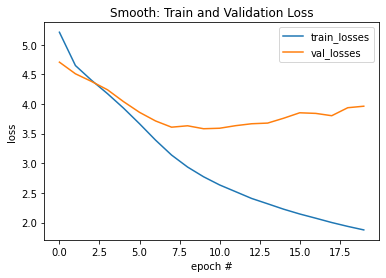

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_smooth,
    'val_losses': val_losses_smooth
}).plot(xlabel='epoch #', ylabel='loss', title='Smooth: Train and Validation Loss')

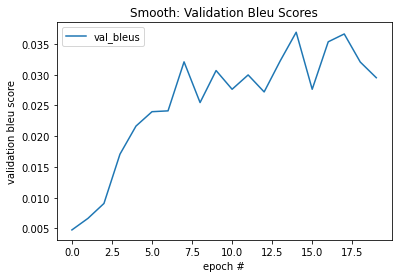

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_smooth
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Smooth: Validation Bleu Scores')

In [ ]:
torch.save(best_model_smooth, PARENT_DIR+"jennas_model_smooth")

# Smooth POS

In [ ]:
model_smooth_pos = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "smooth_pos",
    unigram_freq = uni,
    source_pos_idx = train_ds.source_pos_idx,
    gamma = 0.10
).to(device)


best_model_smooth_pos, train_losses_smooth_pos, val_losses_smooth_pos, bleus_smooth_pos, which_smooth_pos = train(
    model_smooth_pos,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_pos",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_pos contains []
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.213, Val loss: 4.706,Epoch time = 172.145s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.004484909909146749


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.661, Val loss: 4.509,Epoch time = 173.279s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.003761394602613849


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.425, Val loss: 4.402,Epoch time = 172.860s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.217, Val loss: 4.257,Epoch time = 173.087s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01174619009646837


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.987, Val loss: 4.036,Epoch time = 173.603s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.019784221942031603


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.736, Val loss: 3.886,Epoch time = 173.868s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02046708474317102


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.469, Val loss: 3.770,Epoch time = 174.245s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02519540413641877


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.224, Val loss: 3.616,Epoch time = 174.490s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0259782094391191


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 3.019, Val loss: 3.611,Epoch time = 173.701s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024718912364064358


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.851, Val loss: 3.586,Epoch time = 174.666s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.030370475468240975


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.715, Val loss: 3.596,Epoch time = 173.810s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02996453786191446


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.601, Val loss: 3.593,Epoch time = 174.504s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02921154917249185


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.486, Val loss: 3.654,Epoch time = 173.246s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028561618901107626


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.398, Val loss: 3.643,Epoch time = 174.455s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03308340775832755


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.314, Val loss: 3.690,Epoch time = 174.694s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.040923723643829665


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.233, Val loss: 3.749,Epoch time = 175.366s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03070257269459899


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.162, Val loss: 3.765,Epoch time = 174.781s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0317811146253369


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 2.095, Val loss: 3.745,Epoch time = 175.193s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03427606104955858


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 2.028, Val loss: 3.832,Epoch time = 174.850s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.031233548916594786


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.973, Val loss: 3.932,Epoch time = 175.123s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.030907418117664134


In [ ]:
best_model_smooth_pos = torch.load(PARENT_DIR+"jennas_model_smooth_pos")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_smooth_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_smooth_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX,padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.05048187077045441
test bleu_1 0.25063011050224304


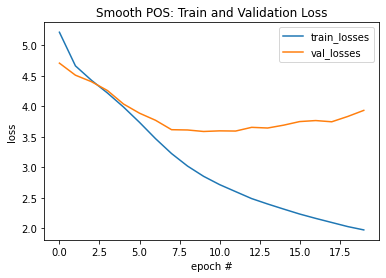

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_smooth_pos,
    'val_losses': val_losses_smooth_pos
}).plot(xlabel='epoch #', ylabel='loss', title='Smooth POS: Train and Validation Loss')

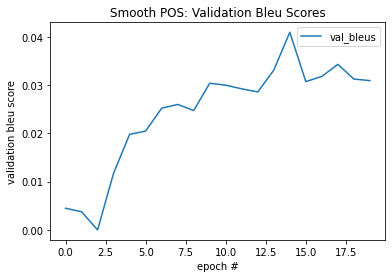

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_smooth_pos
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Smooth POS: Validation Bleu Scores')

In [ ]:
torch.save(best_model_smooth_pos, PARENT_DIR+"jennas_model_smooth_pos")

# LM

In [ ]:
model_lm = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "lmsample",
    language_model = lm,
    gamma = 0.10
).to(device)


best_model_lm, train_losses_lm, val_losses_lm, bleus_lm, which_lm = train(
    model_lm,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_lm",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_lm contains []
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.207, Val loss: 4.702,Epoch time = 176.725s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.006545961761188866


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.643, Val loss: 4.513,Epoch time = 176.448s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0085306973900612


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.390, Val loss: 4.380,Epoch time = 174.531s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01116229638683653


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.169, Val loss: 4.218,Epoch time = 176.284s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01394800012119395


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.929, Val loss: 4.009,Epoch time = 175.541s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.021711287280646894


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.669, Val loss: 3.869,Epoch time = 174.145s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023777469269740708


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.398, Val loss: 3.771,Epoch time = 176.407s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.026373724544034912


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.146, Val loss: 3.622,Epoch time = 175.467s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02358372867969121


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.942, Val loss: 3.618,Epoch time = 176.480s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024422327422637197


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.767, Val loss: 3.605,Epoch time = 174.834s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022364005855160136


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.626, Val loss: 3.631,Epoch time = 174.556s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.020981810355298933


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.510, Val loss: 3.613,Epoch time = 175.583s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024272345337414833


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.394, Val loss: 3.705,Epoch time = 174.465s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02137044517293264


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.301, Val loss: 3.708,Epoch time = 175.675s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022921168376966405


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.213, Val loss: 3.778,Epoch time = 176.532s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.027552689087503884


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.129, Val loss: 3.829,Epoch time = 175.747s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025759229286999415


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.054, Val loss: 3.843,Epoch time = 175.163s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022170448914254196


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.982, Val loss: 3.891,Epoch time = 176.288s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028376645945112963


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.915, Val loss: 3.876,Epoch time = 175.860s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022606332457903236


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.854, Val loss: 4.007,Epoch time = 175.463s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02496035475473164


In [ ]:
best_model_lm = torch.load(PARENT_DIR+"jennas_model_lm")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_lm, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_lm, eos_idx = EOS_IDX, bos_idx = BOS_IDX,padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.03762306272983551
test bleu_1 0.2252294272184372


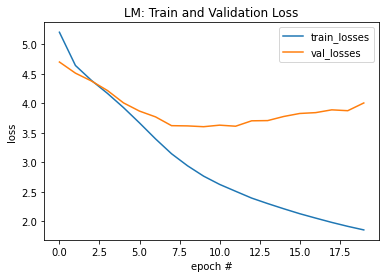

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_lm,
    'val_losses': val_losses_lm
}).plot(xlabel='epoch #', ylabel='loss', title='LM: Train and Validation Loss')

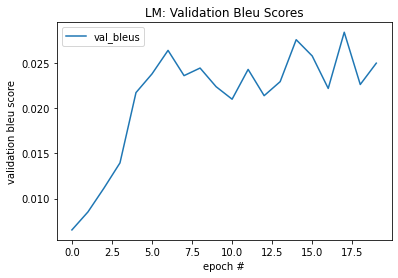

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_lm
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='LM: Validation Bleu Scores')

In [ ]:
torch.save(best_model_lm, PARENT_DIR+"jennas_model_lm")

# LM POS

In [ ]:
model_lm_pos = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "lmsample_pos",
    language_model = lm,
    source_pos_idx = train_ds.source_pos_idx,
    gamma = 0.10
).to(device)


best_model_lm_pos, train_losses_lm_pos, val_losses_lm_pos, bleus_lm_pos, which_lm_pos = train(
    model_lm_pos,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_lm_pos",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_lm_pos contains []
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.206, Val loss: 4.680,Epoch time = 263.596s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.005744905693422078


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.645, Val loss: 4.496,Epoch time = 265.160s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.007233165883782796


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.400, Val loss: 4.385,Epoch time = 263.248s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.00957603713058968


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.185, Val loss: 4.230,Epoch time = 264.718s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.011180439703185392


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.952, Val loss: 4.043,Epoch time = 265.730s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.01689167060767058


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.702, Val loss: 3.896,Epoch time = 264.031s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023260590187607153


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.434, Val loss: 3.784,Epoch time = 266.067s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023189129432985685


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.186, Val loss: 3.631,Epoch time = 263.926s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028127221737579398


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.973, Val loss: 3.627,Epoch time = 266.662s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025252961647647502


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.804, Val loss: 3.550,Epoch time = 265.348s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025922990201814693


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.664, Val loss: 3.620,Epoch time = 262.135s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025950840161395095


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.548, Val loss: 3.645,Epoch time = 265.686s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02997001046806883


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.433, Val loss: 3.677,Epoch time = 262.665s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02351844499056455


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.340, Val loss: 3.678,Epoch time = 262.626s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02181643635227408


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.255, Val loss: 3.669,Epoch time = 266.234s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028456511516390268


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.166, Val loss: 3.788,Epoch time = 264.729s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02505816109347551


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.094, Val loss: 3.848,Epoch time = 264.478s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03046348774680484


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 2.020, Val loss: 3.808,Epoch time = 266.127s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028584648588142303


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.960, Val loss: 3.893,Epoch time = 263.166s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02037610754501184


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.900, Val loss: 3.976,Epoch time = 263.320s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02572787558511623


In [ ]:
best_model_lm_pos = torch.load(PARENT_DIR+"jennas_models_lm_pos/" + "epoch16")

In [ ]:
torch.save(best_model_lm_pos, PARENT_DIR+"jennas_model_lm_pos")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_lm_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_lm_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX,padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.042191505432128906
test bleu_1 0.21889080107212067


In [ ]:
pd.DataFrame({
    'train_losses': train_losses_lm_pos,
    'val_losses': val_losses_lm_pos
}).plot(xlabel='epoch #', ylabel='loss', title='LM POS: Train and Validation Loss')

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_lm_pos
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='LM POS: Validation Bleu Scores')

In [ ]:
torch.save(best_model_lm_pos, PARENT_DIR+"jennas_model_lm_pos")

# Soft

In [ ]:
model_soft = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "soft",
    language_model = lm,
    gamma = 0.10
).to(device)


best_model_soft, train_losses_soft, val_losses_soft, bleus_soft, which_soft = train(
    model_soft,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_soft",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_soft contains []
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.187, Val loss: 4.690,Epoch time = 97.979s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.007259188242574736


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.595, Val loss: 4.447,Epoch time = 98.983s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.011219152985994097


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.319, Val loss: 4.330,Epoch time = 98.347s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.014428883358133863


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.063, Val loss: 4.188,Epoch time = 98.827s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.0170418264023578


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.786, Val loss: 3.970,Epoch time = 98.510s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.016269801904267512


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.470, Val loss: 3.786,Epoch time = 98.455s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02592604817037456


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.148, Val loss: 3.715,Epoch time = 98.815s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02420311397336277


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 2.863, Val loss: 3.566,Epoch time = 98.709s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.029018793416340536


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.632, Val loss: 3.676,Epoch time = 99.235s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02444552688207234


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.446, Val loss: 3.693,Epoch time = 99.132s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02522290418633473


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.288, Val loss: 3.666,Epoch time = 98.187s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.022703008679656012


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.159, Val loss: 3.755,Epoch time = 98.965s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02185837189103504


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.038, Val loss: 3.745,Epoch time = 99.292s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025848085017694894


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 1.921, Val loss: 3.807,Epoch time = 98.546s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028655433303108945


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 1.830, Val loss: 3.867,Epoch time = 99.250s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.030318080985406375


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 1.751, Val loss: 3.967,Epoch time = 99.521s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.024842545860314744


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 1.659, Val loss: 4.001,Epoch time = 98.373s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.026328804529455456


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.596, Val loss: 4.025,Epoch time = 99.307s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.023303308815295753


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.527, Val loss: 4.183,Epoch time = 98.758s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02258818082903077


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.471, Val loss: 4.195,Epoch time = 99.296s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.025531024240380996


In [ ]:
best_model_soft = torch.load(PARENT_DIR+"jennas_model_soft")

In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_soft, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_soft, eos_idx = EOS_IDX, bos_idx = BOS_IDX,padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.04378868639469147
test bleu_1 0.22665837407112122


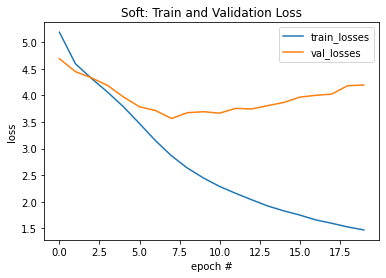

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_soft,
    'val_losses': val_losses_soft
}).plot(xlabel='epoch #', ylabel='loss', title='Soft: Train and Validation Loss')

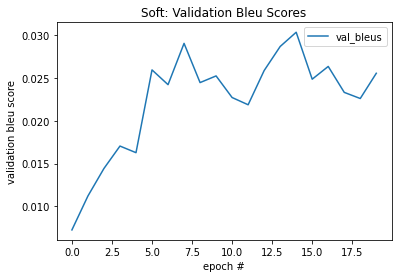

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_soft
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Soft: Validation Bleu Scores')

In [ ]:
torch.save(best_model_soft, PARENT_DIR+"jennas_model_soft")

# Soft POS

In [ ]:
model_soft_pos = Seq2SeqTF(
    src_vocab_size = train_ds.source_vocab_size,
    tgt_vocab_size = train_ds.target_vocab_size,
    device = device,
    padding_idx = PADDING_IDX,
    N = 6, d_model = 512, d_ff = 2048,
    h = 8, dropout = 0.1,
    augmentation_type = "soft_pos",
    language_model = lm,
    source_pos_idx = train_ds.source_pos_idx,
    gamma = 0.10
).to(device)


best_model_soft_pos, train_losses_soft_pos, val_losses_soft_pos, bleus_soft_pos, which = train(
    model_soft_pos,
    train_ds, train_dl, val_ds, val_dl,
    device = device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX, padding_idx = PADDING_IDX,
    epochs = 20, lr = 0.001, weight_decay = 1E-4,
    max_steps=40,
    path = PARENT_DIR+"jennas_models_soft_pos",
    overwrite = True
)

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_models_soft_pos contains []
continuing anyways ... some files may be overwritten


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Train loss: 5.204, Val loss: 4.711,Epoch time = 396.993s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.02028985507786274


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2, Train loss: 4.631, Val loss: 4.501,Epoch time = 401.865s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.028360918164253235


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3, Train loss: 4.377, Val loss: 4.362,Epoch time = 400.651s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03358282148838043


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4, Train loss: 4.160, Val loss: 4.209,Epoch time = 397.242s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.03866448253393173


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5, Train loss: 3.922, Val loss: 4.025,Epoch time = 401.242s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05353264883160591


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6, Train loss: 3.648, Val loss: 3.857,Epoch time = 400.402s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05807926505804062


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7, Train loss: 3.370, Val loss: 3.773,Epoch time = 401.179s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05420245602726936


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8, Train loss: 3.114, Val loss: 3.615,Epoch time = 391.182s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05149748548865318


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9, Train loss: 2.903, Val loss: 3.611,Epoch time = 391.184s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.057510826736688614


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10, Train loss: 2.734, Val loss: 3.559,Epoch time = 391.550s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.061898138374090195


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11, Train loss: 2.591, Val loss: 3.639,Epoch time = 388.327s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.06470372527837753


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12, Train loss: 2.474, Val loss: 3.555,Epoch time = 389.341s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.06414978206157684


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13, Train loss: 2.358, Val loss: 3.643,Epoch time = 385.469s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05876409634947777


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14, Train loss: 2.268, Val loss: 3.680,Epoch time = 389.052s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05854736268520355


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15, Train loss: 2.180, Val loss: 3.644,Epoch time = 392.140s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.06507927924394608


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16, Train loss: 2.090, Val loss: 3.812,Epoch time = 391.830s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05262041464447975


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17, Train loss: 2.020, Val loss: 3.759,Epoch time = 391.505s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.06083330884575844


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18, Train loss: 1.948, Val loss: 3.768,Epoch time = 389.782s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.055200207978487015


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19, Train loss: 1.883, Val loss: 3.872,Epoch time = 388.922s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.05224379152059555


  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20, Train loss: 1.828, Val loss: 3.941,Epoch time = 388.506s


  0%|          | 0/3 [00:00<?, ?it/s]

Validation Bleu: 0.04869791492819786


In [ ]:
# candidate_text, reference_text = translate_corpus(train_ds.target_vocab, train_dl, best_model_soft_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX, max_steps = 40)
# train_bleu = bleu_score(candidate_text, reference_text)
# print("train bleu:", train_bleu)

candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, best_model_soft_pos, eos_idx = EOS_IDX, bos_idx = BOS_IDX, padding_idx = PADDING_IDX, max_steps = 40)
test_bleu = bleu_score(candidate_text, reference_text)
print("test bleu", test_bleu)
test_bleu1 = bleu_score(candidate_text, reference_text, max_n=1, weights = [1])
print("test bleu_1", test_bleu1)

  0%|          | 0/5 [00:00<?, ?it/s]

test bleu 0.05217479541897774
test bleu_1 0.25465312600135803


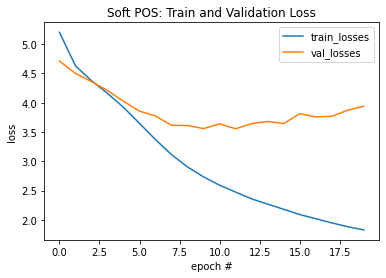

In [ ]:
pd.DataFrame({
    'train_losses': train_losses_soft_pos,
    'val_losses': val_losses_soft_pos
}).plot(xlabel='epoch #', ylabel='loss', title='Soft POS: Train and Validation Loss')

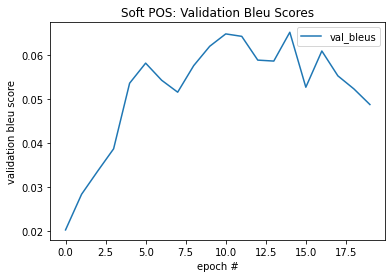

In [ ]:
pd.DataFrame({
    'val_bleus': bleus_soft_pos
}).plot(xlabel='epoch #', ylabel='validation bleu score', title='Soft POS: Validation Bleu Scores')

In [ ]:
torch.save(best_model_soft_pos, PARENT_DIR+"jennas_model_soft_pos")